## Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import glob
import matplotlib as plt
from collections import OrderedDict
import random

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import glob, os
from sklearn.model_selection import train_test_split


from scripts_spyder_eegsignals_ import *

## Subject 1 Data and Events Loading 

In [2]:
path_data = "C:\\Users\\amoha\\Downloads\\train\\subj1_data"
path_label= "C:\\Users\\amoha\\Downloads\\train\\subj1_events"
subj1_data, subj1_label = [] , []
for file in glob.glob(path_data + "\\*.csv"):
    subj1_data.append(file)
for file in glob.glob(path_label + "\\*.csv"):
    subj1_label.append(file)

all_data = pd.DataFrame()
all_labels = pd.DataFrame()
for i,j in zip(subj1_data, subj1_label):
    dataa = pd.read_csv(f"{i}")
    events = pd.read_csv(f"{j}")
    dataa.drop(["id"],axis = 1, inplace = True)
    events.drop(["id"],axis = 1, inplace = True)
    all_data = all_data.append(dataa)
    all_labels = all_labels.append(events)

C:\Users\amoha\AppData\Local\Temp\ipykernel_20932\1811885986.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(dataa)
C:\Users\amoha\AppData\Local\Temp\ipykernel_20932\1811885986.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_labels = all_labels.append(events)
C:\Users\amoha\AppData\Local\Temp\ipykernel_20932\1811885986.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(dataa)
C:\Users\amoha\AppData\Local\Temp\ipykernel_20932\1811885986.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_labels = all_labels.append(events)
C:\Users\amoha\AppData\Local\Temp\ipykerne

## Data preprocessing

In [3]:
start_end_data = start_end_data_finder(all_labels)
data_extracted_occurances = np.reshape(data_extractor(start_end_data,all_data),(6*260,149,32) )

no_events_data_extracted = data_extractor_noevent(all_data, all_labels,1560)
final_data = np.empty(0*149*32)
final_data = np.concatenate((data_extracted_occurances,no_events_data_extracted))
final_data = np.reshape(final_data, (3120,149*32))

class_labels = np.ones(1560)

for i in range(6):
    class_labels[i*260:(i+1)*260] = class_labels[i*260:(i+1)*260] *(i)

noevent_label = np.ones(1560)*(6)

all_class_labels = np.concatenate((class_labels,noevent_label))


#### Scaling and Shuffling

In [4]:

from sklearn.preprocessing import StandardScaler
all_data_shuffled , all_labels_shuffled = shuffle(final_data, all_class_labels, random_state = 0)


ss = StandardScaler()
all_data_shuffled_scaled = ss.fit_transform(all_data_shuffled)


### Dimentionality reduction

In [5]:
from sklearn.decomposition import PCA
    
n_components = 15
pca = PCA(n_components = n_components)
pca.fit(all_data_shuffled)
pca_tr = pca.fit_transform(all_data_shuffled_scaled)

## Model Analysis

#### Support Vector machines

Accuracy: 0.7628205128205128


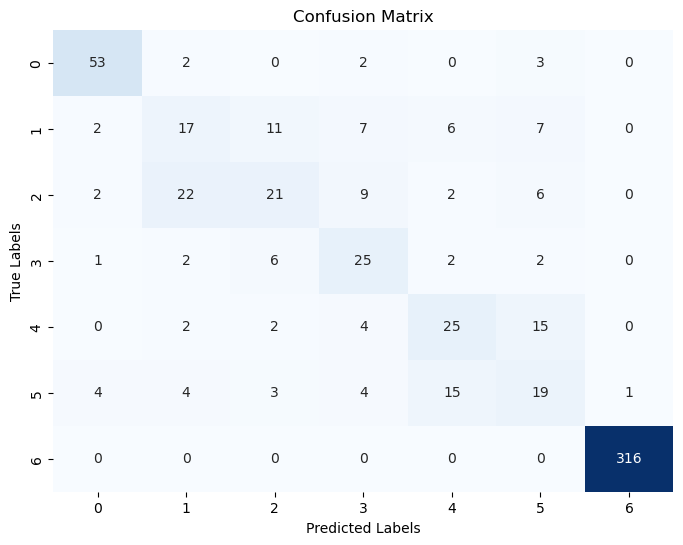

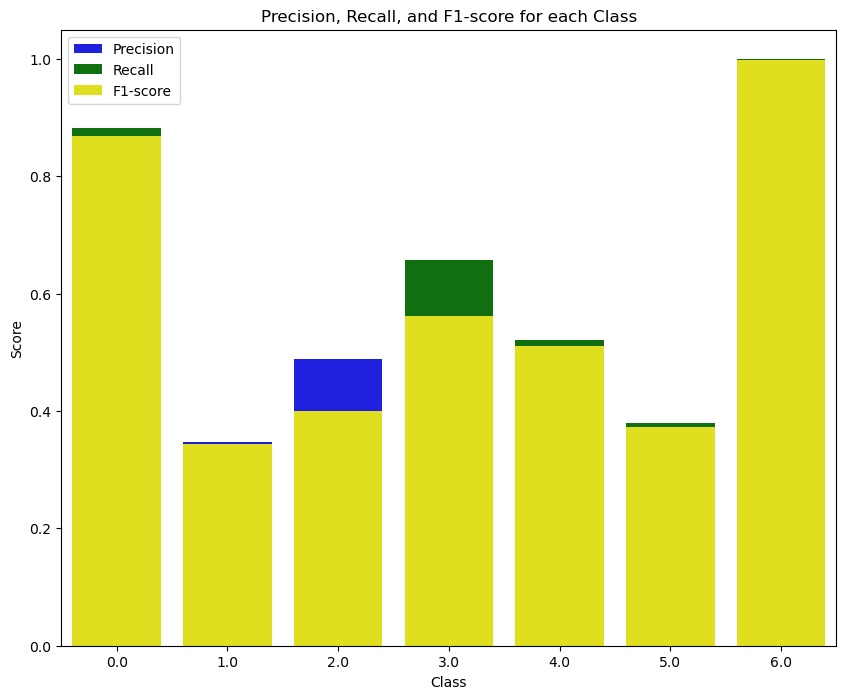

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87        60
         1.0       0.35      0.34      0.34        50
         2.0       0.49      0.34      0.40        62
         3.0       0.49      0.66      0.56        38
         4.0       0.50      0.52      0.51        48
         5.0       0.37      0.38      0.37        50
         6.0       1.00      1.00      1.00       316

    accuracy                           0.76       624
   macro avg       0.58      0.59      0.58       624
weighted avg       0.76      0.76      0.76       624



In [5]:
from sklearn.svm import SVC

model = SVC(kernel="rbf")
evaluate_model(model, all_data_shuffled_scaled, all_labels_shuffled)

#### Random Forest Model

Accuracy: 0.7467948717948718


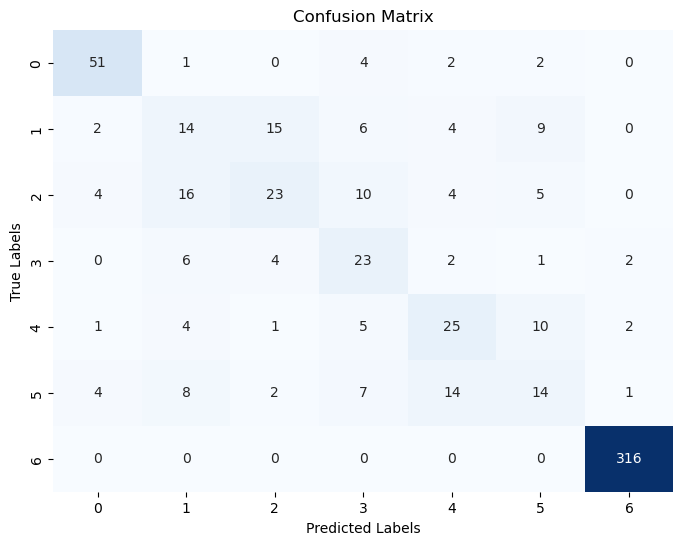

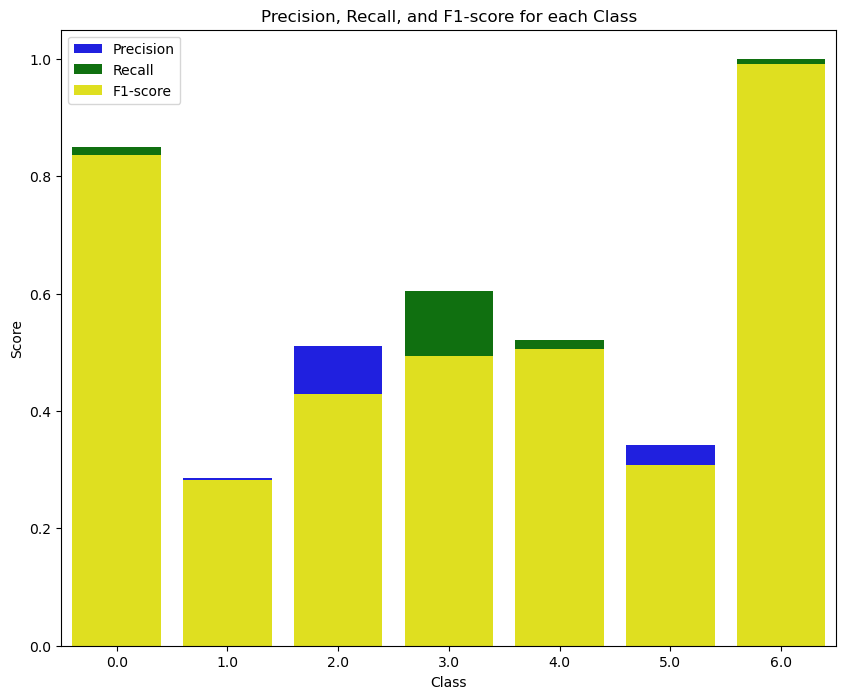

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84        60
         1.0       0.29      0.28      0.28        50
         2.0       0.51      0.37      0.43        62
         3.0       0.42      0.61      0.49        38
         4.0       0.49      0.52      0.51        48
         5.0       0.34      0.28      0.31        50
         6.0       0.98      1.00      0.99       316

    accuracy                           0.75       624
   macro avg       0.55      0.56      0.55       624
weighted avg       0.74      0.75      0.74       624



In [7]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000)
evaluate_model(model, all_data_shuffled_scaled, all_labels_shuffled)

#### K nearest neighbor

In [13]:
#################Implementing ##############
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn5 = KNeighborsClassifier(n_neighbors = 5)
knn1 = KNeighborsClassifier(n_neighbors=1)
knn10 = KNeighborsClassifier(n_neighbors=10)

knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)
knn10.fit(X_train, y_train)

y_pred_10 = knn10.predict(X_test)
y_pred_5 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)

print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=1", accuracy_score(y_test, y_pred_1)*100)
print("Accuracy with k=10", accuracy_score(y_test, y_pred_10)*100)

Accuracy with k=5 63.62179487179487
Accuracy with k=1 58.493589743589745
Accuracy with k=10 65.86538461538461


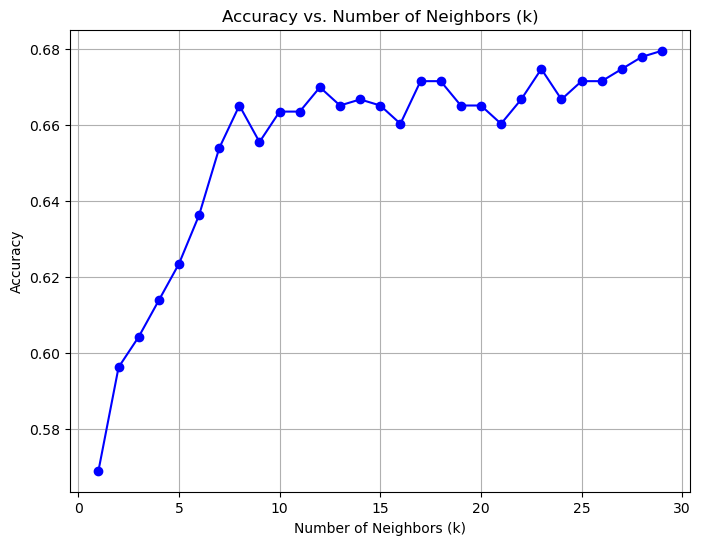

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_data_shuffled_scaled, all_labels_shuffled, test_size=0.2, random_state=42)

# Initialize lists to store accuracy scores for different k values
k_values = list(range(1, 30))
accuracy_scores = []

# Loop through different k values
for k in k_values:
    # Create and fit the k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the accuracy scores for different k values
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.grid(True)
plt.show()


#### xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Data preprocessing and splitting
X = all_data_shuffled_scaled
y = all_labels_shuffled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters and ranges for grid search
params = {
    'xgbclassifier__eval_metric': ['mlogloss'],  # Wrap 'eval_metric' in XGBClassifier pipeline
    'xgbclassifier__use_label_encoder': [False],  # Wrap 'use_label_encoder' in XGBClassifier pipeline
    'xgbclassifier__n_jobs': [16],  # Wrap 'n_jobs' in XGBClassifier pipeline
    'xgbclassifier__tree_method': ['exact'],  # Wrap 'tree_method' in XGBClassifier pipeline
    'xgbclassifier__objective': ['multi:softprob'],  # Wrap 'objective' in XGBClassifier pipeline
    'xgbclassifier__random_state': [0],  # Wrap 'random_state' in XGBClassifier pipeline
    'xgbclassifier__n_estimators': [100, 150, 200, 250, 300, 350],  # Wrap 'n_estimators' in XGBClassifier pipeline
    'xgbclassifier__learning_rate': [0.0001, 0.001, 0.01, 0.1],  # Wrap 'learning_rate' in XGBClassifier pipeline
    'xgbclassifier__max_depth': [2, 3, 4, 5, 6, 7, 8, 9],  # Wrap 'max_depth' in XGBClassifier pipeline
    'xgbclassifier__gamma': [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],  # Wrap 'gamma' in XGBClassifier pipeline
    'xgbclassifier__reg_lambda': [1, 1.5, 2, 3, 4.5],  # Wrap 'reg_lambda' in XGBClassifier pipeline
    'xgbclassifier__subsample': [0.8, 0.85, 0.9, 1.0],  # Wrap 'subsample' in XGBClassifier pipeline
    'xgbclassifier__colsample_bylevel': np.arange(0.3, 1, 0.1),  # Wrap 'colsample_bylevel' in XGBClassifier pipeline
}

# Create the XGBoost classifier
model = XGBClassifier()

# Create a pipeline with standard scaling and XGBoost classifier
pipeline = make_pipeline(StandardScaler(), model)

# Perform grid search over hyperparameters
grid_search = GridSearchCV(pipeline, params, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

# Get the best model and its accuracy
best_model = grid_search.best_estimator_
best_accuracy = grid_search.best_score_

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy on the test set
XGBoost_acc = accuracy_score(y_test, y_pred)

# Print the results
print(f"The best accuracy of XGBoost model is {best_accuracy:.4f}")
print(f"The accuracy of the best XGBoost model on the test set is {XGBoost_acc:.4f}")
